# CoCliCo: Examples of plots to show in front end 


In [1]:
# Optional; code formatter, installed as jupyter lab extension
%load_ext lab_black

In [2]:
import xarray as xr

ds = xr.open_zarr("gcs://hydro-engine-public/coclico/CoastAlRisk_Europe_EESSL.zarr")

In [3]:
# return period (x-axis) will be same for all scenario's
return_period = ds["RP"].values

In [4]:
# function to extract ssl values at certain station for certain scenario
f_ssl_values = (
    lambda station, scenario: ds.isel(stations=station)
    .sel(scenario=scenario)["ssl"]
    .values
)

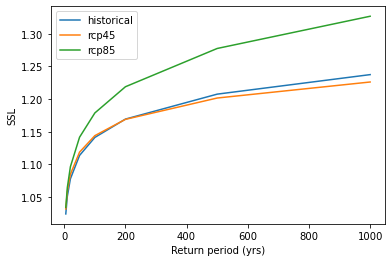

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(
    return_period, f_ssl_values(station=0, scenario="historical"), label="historical"
)
ax.plot(return_period, f_ssl_values(station=0, scenario="rcp45"), label="rcp45")
ax.plot(return_period, f_ssl_values(station=0, scenario="rcp85"), label="rcp85")
ax.set_xlabel("Return period (yrs)")
ax.set_ylabel("SSL")
plt.legend()